# Capstone Project - The Battle of Neighborhoods (Week 1).

## A description of the problem and a discussion of the background.

New York City is the most populated city in the United States. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States,located at the southern tip of the U.S. state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass.With almost 20 million people in its metropolitan statistical area and approximately 23 million in its combined statistical area, it is one of the world's most populous mega cities. New York City has been described as the cultural, financial, and media capital of the world, significantly influence commerce,entertainment,research,technology,education,politics,tourism,art,fashion and sports. 

In this project we will explore, analyze and give recommendations on Italian cuisine in each of the five different boroughs of New York City namely, Bronx, Brooklyn, Manhattan, Queens and Staten Island. The City is a home to many immigrants of different ethnic groups. Almost all ethnic cuisines are well represented in New York City, both within and outside the various ethnic neighborhoods. As many as 800 languages are spoken in New York, making it the most linguistically diverse city in the world. New York is home to more than 3.2 million residents born outside the United States,the largest foreign-born population of any city in the world as of 2016. 

After the data analysis, questions like where to open an Italian restaurant or the best borough to open an Italian restaurant, the borough to find most Italian restaurants or the borough with the least Italian restaurants will be answered.


# A description of the data and how it will be used to solve the problem.


This is our Data Source - https://cocl.us/new_york_dataset

The geo data https://geo.nyu.edu/catalog/nyu_2451_34572 

1. We will utilize the Foursquare API to explore and segment the neighborhoods dataset that contains the 5 boroughs and the neighborhoods that exist in each borough. We will use geopy library to get the latitude and longitude coordinates of each neighborhood. Will use Folium library on the coordinates for visualization of the map of the neighborhood and the explore function to get the most common venue categories in each neighborhood. 
2. We will further Explore the venue categories to filter out the number of Italian restaurants in each of the 5 boroughs and give a statistical recommendations. We will also find the rating of each specified restaurant in our analysis and finally run k-means to cluster the neighborhood into 5 clusters.

This data analysis and approach can be apply to filter other ethnic cuisines like Indian Restaurants, African Restaurants, Chinese restaurants, Jamaican Restaurants or any other cuisine of culture of interest one may wish to analyse in New York City.



Import, install and download all libraries and APIs that are necessary or required for the lab.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         395 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

# 1. Let's download and explore the dataset.

#### Run a wget command to access the data.

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


#### Load the data and store it in ny_data

In [3]:
with open('newyork_data.json') as json_data:
    ny_data = json.load(json_data)
ny_data


{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

#### All the relevant data is in the features key, which is a list of the neighborhoods. We define a new variable (neighborhoods_data) that includes this data.

In [4]:
neighborhoods_data = ny_data['features']
neighborhoods_data[0]


{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### We create empty dataframe to transform the data into pandas dataframe.

In [200]:
# dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# create the dataframe call neighborhoods
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


#### Loop through the data and fill each row of the dataframe and examine the resulting dataframe.

In [201]:

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
print(neighborhoods.shape)
neighborhoods.head()

(306, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


#### Check if the dataset has all 5 boroughs and 306 neighborhoods.

In [202]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.
Define a user_agent (ny_explorer) in order to define an instance of the geocoder.

In [203]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top using follium library for visualization.
Click on each circle mark to reveal the name of the neighborhood and its respective borough.

In [204]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### We utilize the Foursquare API to explore the neighborhoods and segment them.

Define Foursquare Credentials and Version

In [9]:
CLIENT_ID = 'H3VC4S5R0Z21OAWZSQEQBURBBHBD21PXDMH2NQ25RFKQ1VN3' # your Foursquare ID
CLIENT_SECRET = 'WNNHTQUIQT00UONGSSZYARYZB3QWDI0HAZ01U5T3EPZ2IVB2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H3VC4S5R0Z21OAWZSQEQBURBBHBD21PXDMH2NQ25RFKQ1VN3
CLIENT_SECRET:WNNHTQUIQT00UONGSSZYARYZB3QWDI0HAZ01U5T3EPZ2IVB2


## 1.0 We segment and cluster the neighborhoods in each of the 5 broughs. 

#### We will start with the borough Bronx, slice the original dataframe and create a new dataframe of the bronx data.

In [10]:
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
print(bronx_data.shape)
bronx_data.head()

(52, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


#### Get the geographical coordinates of the bronx.

In [192]:
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.8466508, -73.8785937.


#### Visualize the map of bronx neighborhood using folium.
click on each circle mark to reveal the name of the each neighborhood in the bronx borough.

In [193]:
# create map of Bronx using latitude and longitude values
map_bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

#### Let's explore the first neighborhood in our dataframe.
Get the neighborhood's name.

In [11]:
bronx_data.loc[0, 'Neighborhood']

'Wakefield'

#### Get the neighborhood's latitude and longitude values of the first neighborhood of New York data.

In [12]:
ny_neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
ny_neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

ny_neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name
#ny_neighborhood_borough = neighborhoods.loc[0, 'Borough'] # neighborhood name


print('Latitude and longitude values of {} are {}, {}.'.format(ny_neighborhood_name, 
                                                               ny_neighborhood_latitude, 
                                                               ny_neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


#### Now, let's get the top 100 venues that are in Wakefield within a radius of 500 meters.
We first create the GET request URL and name URL as url.

In [13]:

# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ny_neighborhood_latitude, 
    ny_neighborhood_longitude, 
    radius, 
    LIMIT)

# display URL
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=H3VC4S5R0Z21OAWZSQEQBURBBHBD21PXDMH2NQ25RFKQ1VN3&client_secret=WNNHTQUIQT00UONGSSZYARYZB3QWDI0HAZ01U5T3EPZ2IVB2&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

#### Send the GET request and examine the results

In [14]:
#return requests.get(url).json()
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee96197ba3e4d28f9488da5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLn

#### We use the Foursquare get_category_type function to get the categories.

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Clean the json and structure it into a pandas dataframe.

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print(nearby_venues.shape)
nearby_venues.head()

(9, 4)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Walgreens,Pharmacy,40.896528,-73.844700
2,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
3,Rite Aid,Pharmacy,40.896649,-73.844846
4,Dunkin',Donut Shop,40.890459,-73.849089


#### Check how many venues were returned by Foursquare?

In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


# 1.1. We will use the getNearbyVenues function to explore each Neighborhoods in all the 5 boroughs of New York City.


In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng, in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #results = requests.get(url).json()["response"][0]['items']
        
        #results = requests.get(url).json()
       # venue_data=results["response"]['groups'][0]['items']
       
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the getNearbyVenues function on each neighborhood in bronx data and create a new dataframe called bronx_venues

In [22]:
bronx_venues = getNearbyVenues(names=bronx_data['Neighborhood'],
                                   latitudes=bronx_data['Latitude'],
                                   longitudes=bronx_data['Longitude']
                                   
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [23]:
#Check the size of the resulting dataframe

print(bronx_venues.shape)
bronx_venues.head()

(1216, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [24]:
#Check how many unique categories we have in bronx venue

print('There are {} unique categories.'.format(len(bronx_venues['Venue Category'].unique())))

There are 174 unique categories.


### Find all the Italian restaurants in bronx venues from the Venue Category and create a dataframe italian_bronx.

In [26]:
#italian_restaurant_bronx = ['Italian Restaurant']
#italian_data = bronx_venues[bronx_venues['Venue Category'].isin(italian_restaurant_bronx)].reset_index(drop=True)                             
#italian_data = pd.DataFrame(italian_data)
#print(italian_data.shape)
#italian_data  

#bronx_italian_resturants=bronx_venues[bronx_venues['Venue Category']=='Italian Restaurant']
bronx_italian_resturants=bronx_venues[bronx_venues['Venue Category'].str.contains('Italian Restaurant')] 
italian_bronx = pd.DataFrame(bronx_italian_resturants)
print(italian_bronx.shape)
italian_bronx.head()


(41, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
130,Woodlawn,40.898273,-73.867315,Patrizia's Of Woodlawn,40.900638,-73.867724,Italian Restaurant
206,Pelham Parkway,40.857413,-73.854756,Enzo's,40.854232,-73.854362,Italian Restaurant
215,Pelham Parkway,40.857413,-73.854756,Pasta Pasta,40.854788,-73.854929,Italian Restaurant
230,City Island,40.847247,-73.786488,Artie's Steak and Seafood,40.849542,-73.787317,Italian Restaurant
470,High Bridge,40.836623,-73.926102,Giovanni's Iv Italian Restraurant & Pizzeria,40.835239,-73.920861,Italian Restaurant


##### From the dataframe above we have a total of 41 Italian Restaurants in the bronx venues we have from our New York City data.

### Bar plot showing the number of Italian Restaurants in the neighborhoods of the bronx.

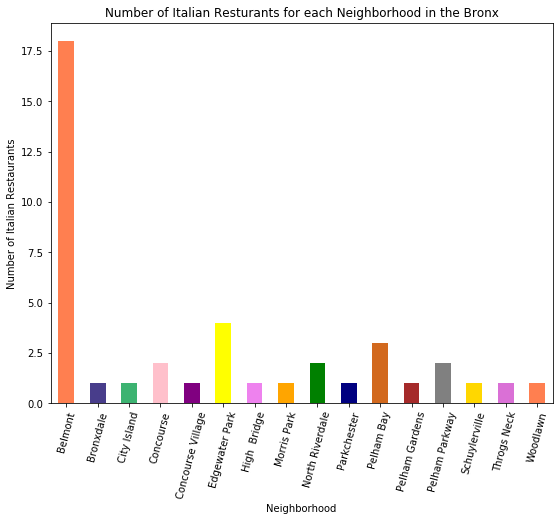

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


italian_bronx.groupby('Neighborhood')['Venue Category'].count().plot(kind='bar', 
                                                                     figsize=(9,7), 
                                                                     color=['coral', 'darkslateblue', 
                                                                            'mediumseagreen', 'pink', 'purple',
                                                                            'yellow', 'violet', 'orange', 'green',
                                                                            'navy', 'chocolate', 'brown', 'grey', 
                                                                            'gold', 'orchid'])
plt.xticks(rotation=75)
plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Italian Restaurants') # add y-label to the plot
plt.title('Number of Italian Resturants for each Neighborhood in the Bronx') # add title to the plot
#plt.legend() 

plt.show()

#### From the bar chart above 
## Belmont neighborhood
#### has more Italian Restaurants in the bronx venues than any other neighborhoods.

## 1.1. Analyze italian restaurants in each venue in the bronx data of each Neighborhoods .

In [28]:
# one hot encoding
bronx_onehot = pd.get_dummies(italian_bronx[['Venue']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bronx_onehot['Neighborhood'] = italian_bronx['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]
print(bronx_onehot.shape)
bronx_onehot.head()

(41, 39)


,Neighborhood,Ann & Tony's - An Original Arthur Avenue Restaurant,Antonio's Trattoria,Arthur Avenue Cafe,Arthur Avenue Fiasco,Artie's Steak and Seafood,Beccofino,Cafe al Mercato,Calabria Pork Store,David Greco's Arthur Avenue Trattoria,Dominick's Restaurant,Emilia's Restaurant,Enzo's,F & J Pine Tavern,Fratelli's,Gerbasi Ristorante,Giovanni's Italian Restaurant,Giovanni's Iv Italian Restraurant & Pizzeria,Lorraine's Bar and Grill,Louis Seafood,Lucca Italian Restaurant,Madison's,Mario's Restaurant & Catering,Michaelangelo's Coal Fired Brick Oven Pizza Restaurant,Pasquale Riggaletto's,Pasta Pasta,Patricia's,Patricia's of Tremont,Patrizia's Of Woodlawn,Porto Salvo,Rino's Italian Restaurant,Roberto's,San Gennaro Ristorante,Spoto's Italian Restaurant,Tino's Delicatessen,Tiny's Pizza & Pasta,Tosca Marquee,Tra Di Noi,Villa Barone Ristorante
130,Woodlawn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
206,Pelham Parkway,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
215,Pelham Parkway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
230,City Island,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
470,High Bridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [29]:
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
print(bronx_grouped.shape)
bronx_grouped.head()


(16, 39)


,Neighborhood,Ann & Tony's - An Original Arthur Avenue Restaurant,Antonio's Trattoria,Arthur Avenue Cafe,Arthur Avenue Fiasco,Artie's Steak and Seafood,Beccofino,Cafe al Mercato,Calabria Pork Store,David Greco's Arthur Avenue Trattoria,Dominick's Restaurant,Emilia's Restaurant,Enzo's,F & J Pine Tavern,Fratelli's,Gerbasi Ristorante,Giovanni's Italian Restaurant,Giovanni's Iv Italian Restraurant & Pizzeria,Lorraine's Bar and Grill,Louis Seafood,Lucca Italian Restaurant,Madison's,Mario's Restaurant & Catering,Michaelangelo's Coal Fired Brick Oven Pizza Restaurant,Pasquale Riggaletto's,Pasta Pasta,Patricia's,Patricia's of Tremont,Patrizia's Of Woodlawn,Porto Salvo,Rino's Italian Restaurant,Roberto's,San Gennaro Ristorante,Spoto's Italian Restaurant,Tino's Delicatessen,Tiny's Pizza & Pasta,Tosca Marquee,Tra Di Noi,Villa Barone Ristorante
0,Belmont,0.055556,0.055556,0.055556,0.055556,0.0,0.0,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.055556,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.055556,0.0,0.055556,0.0,0.0,0.055556,0.0
1,Bronxdale,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,City Island,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,Concourse,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.5,0.0,0.000000,0.0
4,Concourse Village,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


#### Print each neighborhood in bronx_grouped along with the top 5 most common venues.

In [30]:
bronx_top_italian_venues = 5

for hood in bronx_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bronx_grouped[bronx_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(bronx_top_italian_venues))
    print('\n')


----Belmont----
                                               venue  freq
0  Ann & Tony's - An Original Arthur Avenue Resta...  0.06
1                                Emilia's Restaurant  0.06
2                                          Roberto's  0.06
3                             San Gennaro Ristorante  0.06
4                      Mario's Restaurant & Catering  0.06


----Bronxdale----
                                               venue  freq
0                                  F & J Pine Tavern   1.0
1  Ann & Tony's - An Original Arthur Avenue Resta...   0.0
2                                        Porto Salvo   0.0
3  Michaelangelo's Coal Fired Brick Oven Pizza Re...   0.0
4                              Pasquale Riggaletto's   0.0


----City Island----
                                               venue  freq
0                          Artie's Steak and Seafood   1.0
1  Ann & Tony's - An Original Arthur Avenue Resta...   0.0
2                          Rino's Italian Restaurant   0.

#### Put the venues into a pandas dataframe
First, write a function to sort the venues in descending order.

In [31]:
def return_most_common_venues(row, bronx_top_italian_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:bronx_top_italian_venues]

#### Create the new dataframe and display the top 10 bronx italian venues for each neighborhood.

In [32]:
bronx_top_italian_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(bronx_top_italian_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
bronx_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
bronx_neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    bronx_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], bronx_top_italian_venues)
    
print(bronx_neighborhoods_venues_sorted.shape)
bronx_neighborhoods_venues_sorted.head()

(16, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Belmont,Ann & Tony's - An Original Arthur Avenue Resta...,Gerbasi Ristorante,Tra Di Noi,Enzo's,Emilia's Restaurant,Mario's Restaurant & Catering,Michaelangelo's Coal Fired Brick Oven Pizza Re...,Pasquale Riggaletto's,Dominick's Restaurant,David Greco's Arthur Avenue Trattoria
1,Bronxdale,F & J Pine Tavern,Villa Barone Ristorante,Dominick's Restaurant,Giovanni's Iv Italian Restraurant & Pizzeria,Giovanni's Italian Restaurant,Gerbasi Ristorante,Fratelli's,Enzo's,Emilia's Restaurant,David Greco's Arthur Avenue Trattoria
2,City Island,Artie's Steak and Seafood,Villa Barone Ristorante,Dominick's Restaurant,Giovanni's Iv Italian Restraurant & Pizzeria,Giovanni's Italian Restaurant,Gerbasi Ristorante,Fratelli's,F & J Pine Tavern,Enzo's,Emilia's Restaurant
3,Concourse,Giovanni's Iv Italian Restraurant & Pizzeria,Tiny's Pizza & Pasta,David Greco's Arthur Avenue Trattoria,Giovanni's Italian Restaurant,Gerbasi Ristorante,Fratelli's,F & J Pine Tavern,Enzo's,Emilia's Restaurant,Dominick's Restaurant
4,Concourse Village,Porto Salvo,David Greco's Arthur Avenue Trattoria,Giovanni's Italian Restaurant,Gerbasi Ristorante,Fratelli's,F & J Pine Tavern,Enzo's,Emilia's Restaurant,Dominick's Restaurant,Villa Barone Ristorante


### 1.1.2 Borough of Manhattan
Create a new dataframe call manhattan_data from the original dataframe (neighborhoods).

In [33]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
print(manhattan_data.shape)
manhattan_data.head()


(40, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


#### Get the geographical coordinates of the manhattan.

In [206]:

address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


#### Visualize the map of manhattan neighborhood using folium.
#### click on each circle mark to reveal the name of the each neighborhood in the manhattan borough.

In [208]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

#### Get the first location in manhattan data

In [34]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

#### Run the getNearbyVenues function on each neighborhood in manhattan data and create a new dataframe called manhattan_venues.

In [35]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [36]:

#Check the size of the resulting dataframe

print(manhattan_venues.shape)
manhattan_venues.head()

(3142, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


#### Find all the Italian restaurants in manhattan venues from the Venue Category and create a dataframe italian_manhattan

In [37]:
#manhattan_italian_resturants=manhattan_venues[manhattan_venues['Venue Category']=='Italian Restaurant'] 

manhattan_italian_resturants=manhattan_venues[manhattan_venues['Venue Category'].str.contains('Italian Restaurant')]

italian_manhattan = pd.DataFrame(manhattan_italian_resturants)
print(italian_manhattan.shape)
italian_manhattan.head()

(121, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
76,Chinatown,40.715618,-73.994279,Bacaro,40.714468,-73.991589,Italian Restaurant
127,Washington Heights,40.851903,-73.936900,Saggio Restaurant,40.851423,-73.939761,Italian Restaurant
274,Hamilton Heights,40.823604,-73.949688,Fumo,40.821412,-73.950499,Italian Restaurant
340,Manhattanville,40.816934,-73.957385,Pisticci Ristorante,40.814015,-73.960266,Italian Restaurant
343,Manhattanville,40.816934,-73.957385,Bettolona,40.814084,-73.959574,Italian Restaurant


##### From the dataframe above we have a total of 121 Italian Restaurants in the manhattan venues from New York City data.

### Bar plot showing the number of Italian Restaurants in manhattan neighborhoods.

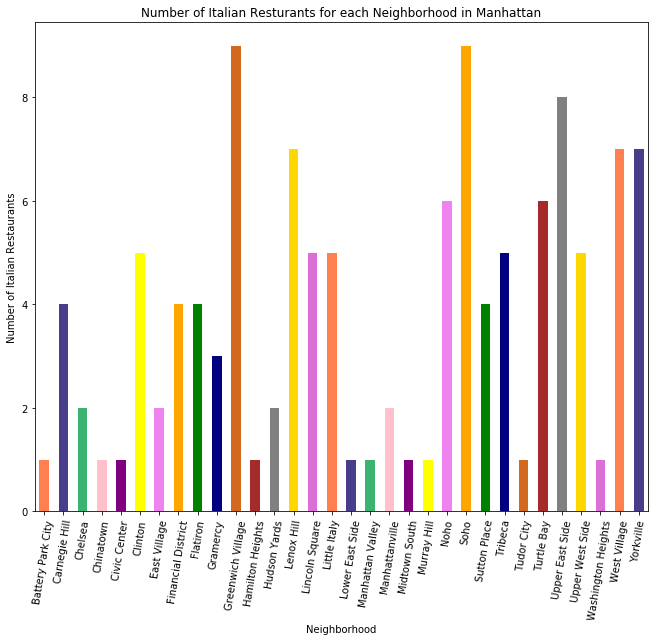

In [38]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


italian_manhattan.groupby('Neighborhood')['Venue Category'].count().plot(kind='bar',
                                                                        
                                                                     figsize=(11,9),
                                                                     color=['coral', 'darkslateblue', 
                                                                            'mediumseagreen', 'pink', 'purple',
                                                                            'yellow', 'violet', 'orange', 'green',
                                                                            'navy', 'chocolate', 'brown', 'grey', 
                                                                            'gold', 'orchid'])
plt.xticks(rotation=81)
plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Italian Restaurants') # add y-label to the plot
plt.title('Number of Italian Resturants for each Neighborhood in Manhattan') # add title to the plot
#plt.legend() 

    
plt.show()

#### From the bar chart above 
## Greenwich Village
#### has more Italian Restaurants in manhattan venues than any other neighborhoods.

## 1.2. Analyze italian restaurants in each venue in the manhattan data of each Neighborhoods .

In [39]:
# one hot encoding
manhattan_onehot = pd.get_dummies(italian_manhattan[['Venue']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = italian_manhattan['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]
print(manhattan_onehot.shape)
manhattan_onehot.head()

(121, 108)


,Neighborhood,83 1/2,Ai Fiori,Antonucci,Arturo's,Aurora,Bacaro,Bar Primi,Bettolona,Bigoi Venezia,Bocca Di Bacco,Cafe Altro Paradiso,Cafe Fiorello,Caffe Buon Gusto - Manhattan,Campagnola Restaurant,Carbone,Carmine's Italian Restaurant,Carroll Place,Celeste,Charlie Bird,Cibo E Vino,Cipriani Downtown,Cotenna,Dante NYC,Del Posto,Delizia 73 Ristorante & Pizza,Elio's,Emporio,Extra Virgin,Felice,Felice 83,Follia,Frank Restaurant,Fumo,Gaetana's Cucina Italiana,Gaia Italian Cafe,Gelso & Grand,Giardino D'oro,Gigino Trattoria,Gina La Fornarina,Gnocco,Harry's Italian Pizza Bar,Hearth,Il Carino,Il Mulino New York,Il Posto Accanto,Il Punto Ristorante,Il Violino Restaurant,Isle of Capri,Italianissimo Ristorante,Joanne Trattoria,L'Amico,L'Artusi,La Pecora Bianca,La Pizza & La Pasta,La Vela Dining & Bar,La Villetta,Lex Restaurant,Lil' Frankie's,Locanda Verde,Maestro Pasta,Maialino,Malaparte,Malatesta Trattoria,Mezzaluna Restaurants,Mimi's Italian Restaurant & Piano Bar,Morandi,Nica Trattoria,Nizza,Noi Due,Noi Due Carne,Osteria 106,Osteria Cotta,Osteria Morini,Parm,Parma Restaurant,Patrizia's of Manhattan,Pepe Rosso To Go,Pepolino,Pietro's,Pisticci Ristorante,Pizzeria Sirenetta,Rezdôra,Ristorante DeGrezia,Ristorante Grifone,Rubirosa Ristorante,Saggio Restaurant,San Carlo Osteria Piemonte,Sant Ambroeus,Sant Ambroeus West Village,Scalinatella,Scalini Fedeli,Sergimmo Salumeria,Sfoglia,Sistina,Song' e Napule Pizzeria,Speedy Romeo LES,Supper,Tavola,Tevere,The Meatball Shop,Tiramisu,Tony's Di Napoli,Tutto Il Giorno Tribeca,Zestys Pizzeria e Salumeria,Zucchero e Pomodori,amata,da Umberto
76,Chinatown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
127,Washington Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
274,Hamilton Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
340,Manhattanville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
343,Manhattanville,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [40]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
print(manhattan_grouped.shape)
manhattan_grouped.head()

(32, 108)


,Neighborhood,83 1/2,Ai Fiori,Antonucci,Arturo's,Aurora,Bacaro,Bar Primi,Bettolona,Bigoi Venezia,Bocca Di Bacco,Cafe Altro Paradiso,Cafe Fiorello,Caffe Buon Gusto - Manhattan,Campagnola Restaurant,Carbone,Carmine's Italian Restaurant,Carroll Place,Celeste,Charlie Bird,Cibo E Vino,Cipriani Downtown,Cotenna,Dante NYC,Del Posto,Delizia 73 Ristorante & Pizza,Elio's,Emporio,Extra Virgin,Felice,Felice 83,Follia,Frank Restaurant,Fumo,Gaetana's Cucina Italiana,Gaia Italian Cafe,Gelso & Grand,Giardino D'oro,Gigino Trattoria,Gina La Fornarina,Gnocco,Harry's Italian Pizza Bar,Hearth,Il Carino,Il Mulino New York,Il Posto Accanto,Il Punto Ristorante,Il Violino Restaurant,Isle of Capri,Italianissimo Ristorante,Joanne Trattoria,L'Amico,L'Artusi,La Pecora Bianca,La Pizza & La Pasta,La Vela Dining & Bar,La Villetta,Lex Restaurant,Lil' Frankie's,Locanda Verde,Maestro Pasta,Maialino,Malaparte,Malatesta Trattoria,Mezzaluna Restaurants,Mimi's Italian Restaurant & Piano Bar,Morandi,Nica Trattoria,Nizza,Noi Due,Noi Due Carne,Osteria 106,Osteria Cotta,Osteria Morini,Parm,Parma Restaurant,Patrizia's of Manhattan,Pepe Rosso To Go,Pepolino,Pietro's,Pisticci Ristorante,Pizzeria Sirenetta,Rezdôra,Ristorante DeGrezia,Ristorante Grifone,Rubirosa Ristorante,Saggio Restaurant,San Carlo Osteria Piemonte,Sant Ambroeus,Sant Ambroeus West Village,Scalinatella,Scalini Fedeli,Sergimmo Salumeria,Sfoglia,Sistina,Song' e Napule Pizzeria,Speedy Romeo LES,Supper,Tavola,Tevere,The Meatball Shop,Tiramisu,Tony's Di Napoli,Tutto Il Giorno Tribeca,Zestys Pizzeria e Salumeria,Zucchero e Pomodori,amata,da Umberto
0,Battery Park City,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,Carnegie Hill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0
2,Chelsea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,Chinatown,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,Civic Center,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


#### Print each neighborhood in mahattan_grouped along with the top 5 most common venues.

In [41]:
manhattan_italian_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(manhattan_italian_top_venues))
    print('\n')

----Battery Park City----
                venue  freq
0                Parm   1.0
1              83 1/2   0.0
2  Pizzeria Sirenetta   0.0
3            Pietro's   0.0
4            Pepolino   0.0


----Carnegie Hill----
                         venue  freq
0               Lex Restaurant  0.25
1  Zestys Pizzeria e Salumeria  0.25
2                    Il Carino  0.25
3                      Sfoglia  0.25
4                       83 1/2  0.00


----Chelsea----
               venue  freq
0          Del Posto   0.5
1  The Meatball Shop   0.5
2             83 1/2   0.0
3            Noi Due   0.0
4           Pietro's   0.0


----Chinatown----
      venue  freq
0    Bacaro   1.0
1    83 1/2   0.0
2     Nizza   0.0
3  Pietro's   0.0
4  Pepolino   0.0


----Civic Center----
            venue  freq
0  Scalini Fedeli   1.0
1          83 1/2   0.0
2         Noi Due   0.0
3        Pietro's   0.0
4        Pepolino   0.0


----Clinton----
                  venue  freq
0  La Vela Dining & Bar   0.2
1      

## Put the venues into a pandas dataframe
First, write a function to sort the venues in descending order.


In [42]:
def return_most_common_venues(row, manhattan_italian_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:manhattan_italian_top_venues]

#### Create the new dataframe and display the top 10 manhattan italian venues for each neighborhood

In [43]:
manhattan_italian_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(manhattan_italian_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
manhattan_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
manhattan_neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    manhattan_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], manhattan_italian_top_venues)
    
print(manhattan_neighborhoods_venues_sorted.shape)
manhattan_neighborhoods_venues_sorted.head()

(32, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Parm,da Umberto,Gina La Fornarina,Felice,Felice 83,Follia,Frank Restaurant,Fumo,Gaetana's Cucina Italiana,Gaia Italian Cafe
1,Carnegie Hill,Sfoglia,Zestys Pizzeria e Salumeria,Lex Restaurant,Il Carino,Gina La Fornarina,Felice,Felice 83,Follia,Frank Restaurant,Fumo
2,Chelsea,Del Posto,The Meatball Shop,da Umberto,Gina La Fornarina,Felice,Felice 83,Follia,Frank Restaurant,Fumo,Gaetana's Cucina Italiana
3,Chinatown,Bacaro,da Umberto,Gnocco,Felice,Felice 83,Follia,Frank Restaurant,Fumo,Gaetana's Cucina Italiana,Gaia Italian Cafe
4,Civic Center,Scalini Fedeli,da Umberto,Gina La Fornarina,Felice,Felice 83,Follia,Frank Restaurant,Fumo,Gaetana's Cucina Italiana,Gaia Italian Cafe


## 1.1.3 Borough of Brooklyn
Create a new dataframe call brooklyn_data from the original dataframe (neighborhoods).

In [44]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
print(brooklyn_data.shape)
brooklyn_data.head()


(70, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


#### Get the geographical coordinates of the brooklyn.


In [210]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


#### Visualize the map of brooklyn neighborhood using folium.
#### click on each circle mark to reveal the name of the each neighborhood in the brooklyn borough.


In [216]:
# create map of brooklyn using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

#### Get the first location of our data

In [45]:
brooklyn_data.loc[0, 'Neighborhood']

'Bay Ridge'

#### Run the getNearbyVenues function on each neighborhood in brooklyn data and create a new dataframe called brooklyn_venues.

In [46]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [47]:
#Check the size of the resulting dataframe
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2730, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
3,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
4,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot


### Find all the Italian restaurants in brooklyn venues from the Venue Category and create a dataframe italian_brooklyn

In [48]:
#brooklyn_italian_resturants=brooklyn_venues[brooklyn_venues['Venue Category']=='Italian Restaurant'] 

brooklyn_italian_resturants=brooklyn_venues[brooklyn_venues['Venue Category'].str.contains('Italian Restaurant')] 

italian_brooklyn = pd.DataFrame(brooklyn_italian_resturants)
print(italian_brooklyn.shape)
italian_brooklyn.head()

(65, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
19,Bay Ridge,40.625801,-74.030621,Tuscany Grill,40.622913,-74.031387,Italian Restaurant
21,Bay Ridge,40.625801,-74.030621,Zio Toto,40.624791,-74.030551,Italian Restaurant
29,Bay Ridge,40.625801,-74.030621,Sofia Restorante Italiano,40.624847,-74.030522,Italian Restaurant
39,Bay Ridge,40.625801,-74.030621,Giacomo's Wood Fired Pizza & Trattoria,40.628535,-74.029051,Italian Restaurant
69,Bay Ridge,40.625801,-74.030621,Zitelli's Thin Crust Pizza and Bar,40.623555,-74.030969,Italian Restaurant


##### From the dataframe above we have a total of 65 Italian Restaurants in the brooklyn venues from New York City data.

## Bar plot showing the number of Italian Restaurants in brooklyn neighborhoods.

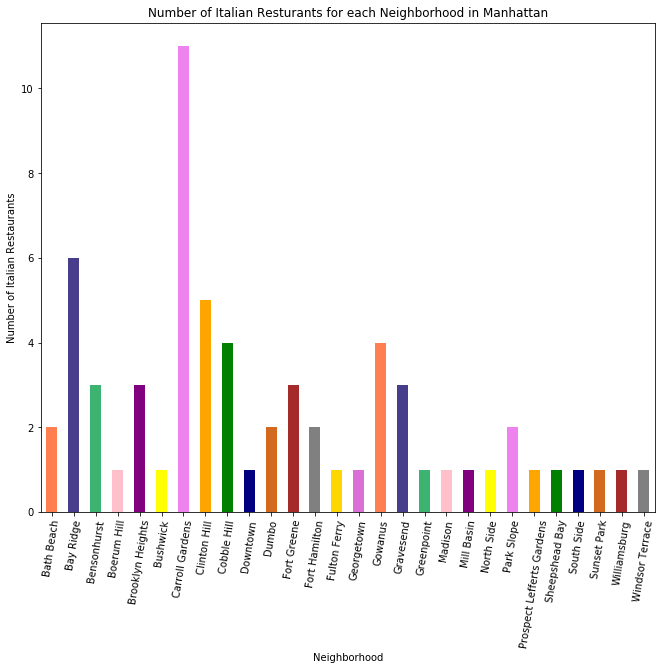

In [49]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

italian_brooklyn.groupby('Neighborhood')['Venue Category'].count().plot(kind='bar',   
                                                                     figsize=(11,9),
                                                                     color=['coral', 'darkslateblue', 
                                                                            'mediumseagreen', 'pink', 'purple',
                                                                            'yellow', 'violet', 'orange', 'green',
                                                                            'navy', 'chocolate', 'brown', 'grey', 
                                                                            'gold', 'orchid'])
plt.xticks(rotation=81)
plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Italian Restaurants') # add y-label to the plot
plt.title('Number of Italian Resturants for each Neighborhood in Manhattan') # add title to the plot
#plt.legend() 

    
plt.show()

#### From the bar chart above 
## Carroll Gardens
#### has more Italian Restaurants in brooklyn venues than any other neighborhoods.

## 1.3. Analyze italian restaurants in each venue in the brooklyn data of each Neighborhoods .

In [50]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(italian_brooklyn[['Venue']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = italian_brooklyn['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
manhattan_onehot = brooklyn_onehot[fixed_columns]
print(brooklyn_onehot.shape)
brooklyn_onehot.head()


(65, 57)


,Aperture Restaurant,Avon,Baci,Bar Tano,Bevacco,Cafe Lore,Cafe On The Hill,Caffe e Vino,Camillo,Campania Coal Fired Pizza,Carmenta’s,Casa Edesia Pizza and Grill,Cecconi's,Ciros on Smith,Claudine's,Da Ciro Brooklyn,Da Nonna Rosa Cucina Italiana,Dino,Dough Vale,Enoteca on Court,Evelina Restaurant,Fragole,Frankies 457 Spuntino,Franks Wine Bar,Gersi,Giacomo's Wood Fired Pizza & Trattoria,Giovanni's Brooklyn Eats,Il Fornetto,Joe's of Avenue U,La PIzzetta,LaRina Pastificio & Vino,Landi's Pork Store,Lillo,Marco Polo Ristorante,Michael's,Michelino's,Naked Dog,Noodle Pudding,Panzerotti Bites,Pino's Ristorante,Popina,Positano,River Deli,Roman’s,Rucola,Sofia Restorante Italiano,Table 87,The Meatball Shop,Tuscany Grill,Verde on Smith,Villa Fiorita,Vinny's of Carroll Gardens,Zio Toto,Zitelli's Thin Crust Pizza and Bar,al di là,il Colosseo,Neighborhood
19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Bay Ridge
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Bay Ridge
29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Bay Ridge
39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bay Ridge
69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Bay Ridge


#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [51]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
print(brooklyn_grouped.shape)
brooklyn_grouped.head()


(28, 57)


,Neighborhood,Aperture Restaurant,Avon,Baci,Bar Tano,Bevacco,Cafe Lore,Cafe On The Hill,Caffe e Vino,Camillo,Campania Coal Fired Pizza,Carmenta’s,Casa Edesia Pizza and Grill,Cecconi's,Ciros on Smith,Claudine's,Da Ciro Brooklyn,Da Nonna Rosa Cucina Italiana,Dino,Dough Vale,Enoteca on Court,Evelina Restaurant,Fragole,Frankies 457 Spuntino,Franks Wine Bar,Gersi,Giacomo's Wood Fired Pizza & Trattoria,Giovanni's Brooklyn Eats,Il Fornetto,Joe's of Avenue U,La PIzzetta,LaRina Pastificio & Vino,Landi's Pork Store,Lillo,Marco Polo Ristorante,Michael's,Michelino's,Naked Dog,Noodle Pudding,Panzerotti Bites,Pino's Ristorante,Popina,Positano,River Deli,Roman’s,Rucola,Sofia Restorante Italiano,Table 87,The Meatball Shop,Tuscany Grill,Verde on Smith,Villa Fiorita,Vinny's of Carroll Gardens,Zio Toto,Zitelli's Thin Crust Pizza and Bar,al di là,il Colosseo
0,Bath Beach,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,Bay Ridge,0.0,0.000000,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.0,0.166667,0.0,0.000000,0.0,0.166667,0.166667,0.0,0.000000
2,Bensonhurst,0.0,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.333333,0.0,0.000000,0.000000,0.0,0.333333
3,Boerum Hill,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,Brooklyn Heights,0.0,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000


#### Print each neighborhood in brooklyn_grouped along with the top 5 most common venues.


In [52]:
brooklyn_italian_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(brooklyn_italian_top_venues))
    print('\n')



----Bath Beach----
                         venue  freq
0            Pino's Ristorante   0.5
1  Casa Edesia Pizza and Grill   0.5
2          Aperture Restaurant   0.0
3                   River Deli   0.0
4           Landi's Pork Store   0.0


----Bay Ridge----
                                    venue  freq
0                                    Baci  0.17
1      Zitelli's Thin Crust Pizza and Bar  0.17
2                                Zio Toto  0.17
3  Giacomo's Wood Fired Pizza & Trattoria  0.17
4                           Tuscany Grill  0.17


----Bensonhurst----
                      venue  freq
0               il Colosseo  0.33
1             Villa Fiorita  0.33
2                      Avon  0.33
3                  Positano  0.00
4  LaRina Pastificio & Vino  0.00


----Boerum Hill----
                      venue  freq
0                    Rucola   1.0
1       Aperture Restaurant   0.0
2                  Positano   0.0
3  LaRina Pastificio & Vino   0.0
4        Landi's Pork Store   0.0

### Put the venues into a pandas dataframe
#### First, write a function to sort the venues in descending order.

In [53]:
def return_most_common_venues(row, brooklyn_italian_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:brooklyn_italian_top_venues]


#### Create the new dataframe and display the top 10 brooklyn italian venues for each neighborhood


In [54]:
brooklyn_italian_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(brooklyn_italian_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
brooklyn_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
brooklyn_neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    brooklyn_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], brooklyn_italian_top_venues)
    
print(brooklyn_neighborhoods_venues_sorted.shape)
brooklyn_neighborhoods_venues_sorted.head()

(28, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Casa Edesia Pizza and Grill,Pino's Ristorante,il Colosseo,Claudine's,Gersi,Franks Wine Bar,Frankies 457 Spuntino,Fragole,Evelina Restaurant,Enoteca on Court
1,Bay Ridge,Zitelli's Thin Crust Pizza and Bar,Zio Toto,Baci,Giacomo's Wood Fired Pizza & Trattoria,Tuscany Grill,Sofia Restorante Italiano,il Colosseo,Dough Vale,Da Ciro Brooklyn,Da Nonna Rosa Cucina Italiana
2,Bensonhurst,il Colosseo,Avon,Villa Fiorita,Ciros on Smith,Gersi,Franks Wine Bar,Frankies 457 Spuntino,Fragole,Evelina Restaurant,Enoteca on Court
3,Boerum Hill,Rucola,il Colosseo,Ciros on Smith,Gersi,Franks Wine Bar,Frankies 457 Spuntino,Fragole,Evelina Restaurant,Enoteca on Court,Dough Vale
4,Brooklyn Heights,Bevacco,Noodle Pudding,River Deli,il Colosseo,Claudine's,Gersi,Franks Wine Bar,Frankies 457 Spuntino,Fragole,Evelina Restaurant


# 1.1.4 Borough of Queens
#### Create a new dataframe call queens_data from the original dataframe (neighborhoods).

In [55]:
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
print(queens_data.shape)
queens_data.head()


(81, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


#### Get the geographical coordinates of the queens.


In [214]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


#### Visualize the map of Queens neighborhood using folium.
#### click on each circle mark to reveal the name of the each neighborhood in the queens borough.

In [215]:
# create map of Queens using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

#### Get the first location in queens data

In [56]:
queens_data.loc[0, 'Neighborhood']

'Astoria'

#### Run the getNearbyVenues function on each neighborhood in queens data and create a new dataframe called queens_venues.

In [57]:
queens_venues = getNearbyVenues(names=queens_data['Neighborhood'],
                                   latitudes=queens_data['Latitude'],
                                   longitudes=queens_data['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [58]:
#Check the size of the resulting dataframe

print(queens_venues.shape)
queens_venues.head()

(2084, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
3,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant
4,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop


### Find all the Italian restaurants in queens venues from the Venue Category and create a dataframe italian_queens

In [59]:
#queens_italian_resturants=queens_venues[queens_venues['Venue Category']=='Italian Restaurant'] 

queens_italian_resturants=queens_venues[queens_venues['Venue Category'].str.contains('Italian Restaurant')] 

italian_queens = pd.DataFrame(queens_italian_resturants)
print(italian_queens.shape)
italian_queens.head()

(40, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
65,Astoria,40.768509,-73.915654,Antika Restaurant & Pizzeria,40.764903,-73.917158,Italian Restaurant
73,Astoria,40.768509,-73.915654,Via Trenta,40.764743,-73.916641,Italian Restaurant
190,Jackson Heights,40.751981,-73.882821,Uncle Peter's,40.755786,-73.883810,Italian Restaurant
285,Howard Beach,40.654225,-73.838138,Brothers Ravioli,40.655282,-73.838991,Italian Restaurant
286,Howard Beach,40.654225,-73.838138,Prima Pasta & Cafe,40.654385,-73.839093,Italian Restaurant


##### From the dataframe above we have a total of 40 Italian Restaurants in the queens venues from New York City data.

## Horizontal Bar plot showing the number of Italian Restaurants in queens neighborhoods.

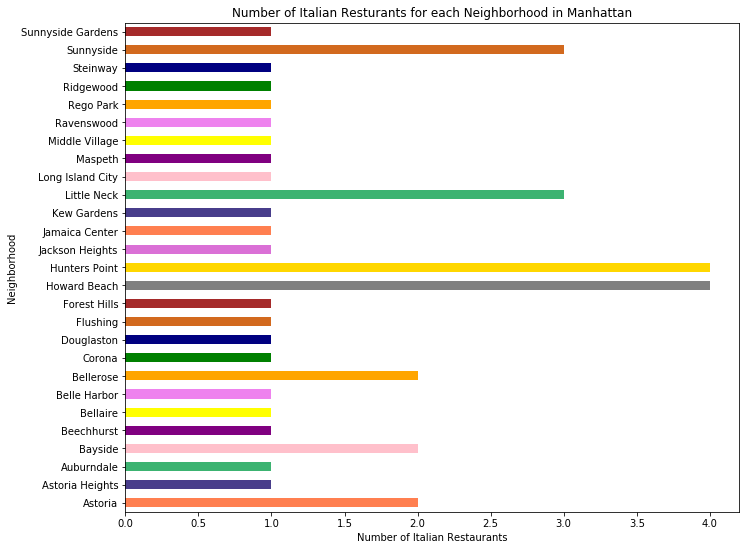

In [61]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

italian_queens.groupby('Neighborhood')['Venue Category'].count().plot(kind='barh',   
                                                                     figsize=(11,9),
                                                                     color=['coral', 'darkslateblue', 
                                                                            'mediumseagreen', 'pink', 'purple',
                                                                            'yellow', 'violet', 'orange', 'green',
                                                                            'navy', 'chocolate', 'brown', 'grey', 
                                                                            'gold', 'orchid'])
#plt.xticks(rotation=81)
plt.xlabel('Number of Italian Restaurants') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Number of Italian Resturants for each Neighborhood in Manhattan') # add title to the plot
#plt.legend() 

    
plt.show()

#### From the bar chart above 
## Hunters Point & Howard Beach
#### has more Italian Restaurants in queens venues than any other neighborhoods.

## 1.4. Analyze italian restaurants in each venue in the brooklyn data of each Neighborhoods .

In [63]:
# one hot encoding
queens_onehot = pd.get_dummies(italian_queens[['Venue']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
queens_onehot['Neighborhood'] = italian_queens['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [queens_onehot.columns[-1]] + list(queens_onehot.columns[:-1])
queens_onehot = queens_onehot[fixed_columns]
print(queens_onehot.shape)
queens_onehot.head()



(40, 41)


,Neighborhood,Alba's Pizza & Restaurant,Antika Restaurant & Pizzeria,Antonio's Kitchen,Arturo's Ristorante Italiano,Aunt Bella's,Avellino Ristorante & Pizzeria,Bella Via,Botte Bar,Brothers Ravioli,Cara Mia Restaurant,Dazie's Restaurant,Divino,Durso's Pasta & Ravioli Company,Il Bacco,Il Sapore Pizza,Joe's Restaurant,La Grotta di Marcello,Magna Restaurant,Manducatis,Manducatis Rustica,Manetta's Ristorante,Mario's Restautant,Numero 28,Oro Restaurant and Lounge,Papazzio Restaurant,Park Side,Patrizia's of Maspeth,Paul Michael Brick Oven Cafe,Plum Tomatoes,Prima Pasta & Cafe,Roma View Catering,SoleLuna,Trattoria Lucia,Trattoria Thirty Five,Uncle Peter's,Via Trenta,Villa Erasmo,Zio Luigi,due ponti ristorante,joey pizza Jamaica ave 166-14
65,Astoria,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
190,Jackson Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
285,Howard Beach,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
286,Howard Beach,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [64]:
queens_grouped = queens_onehot.groupby('Neighborhood').mean().reset_index()
print(queens_grouped.shape)
queens_grouped.head()


(27, 41)


,Neighborhood,Alba's Pizza & Restaurant,Antika Restaurant & Pizzeria,Antonio's Kitchen,Arturo's Ristorante Italiano,Aunt Bella's,Avellino Ristorante & Pizzeria,Bella Via,Botte Bar,Brothers Ravioli,Cara Mia Restaurant,Dazie's Restaurant,Divino,Durso's Pasta & Ravioli Company,Il Bacco,Il Sapore Pizza,Joe's Restaurant,La Grotta di Marcello,Magna Restaurant,Manducatis,Manducatis Rustica,Manetta's Ristorante,Mario's Restautant,Numero 28,Oro Restaurant and Lounge,Papazzio Restaurant,Park Side,Patrizia's of Maspeth,Paul Michael Brick Oven Cafe,Plum Tomatoes,Prima Pasta & Cafe,Roma View Catering,SoleLuna,Trattoria Lucia,Trattoria Thirty Five,Uncle Peter's,Via Trenta,Villa Erasmo,Zio Luigi,due ponti ristorante,joey pizza Jamaica ave 166-14
0,Astoria,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
1,Astoria Heights,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Auburndale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayside,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,Beechhurst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Print each neighborhood in queens_grouped along with the top 5 most common venues.


In [65]:
queens_italian_top_venues = 5

for hood in queens_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = queens_grouped[queens_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(queens_italian_top_venues))
    print('\n')



----Astoria----
                          venue  freq
0                    Via Trenta   0.5
1  Antika Restaurant & Pizzeria   0.5
2     Alba's Pizza & Restaurant   0.0
3            Prima Pasta & Cafe   0.0
4                     Numero 28   0.0


----Astoria Heights----
                       venue  freq
0          Antonio's Kitchen   1.0
1  Alba's Pizza & Restaurant   0.0
2         Roma View Catering   0.0
3  Oro Restaurant and Lounge   0.0
4        Papazzio Restaurant   0.0


----Auburndale----
                             venue  freq
0  Durso's Pasta & Ravioli Company   1.0
1        Alba's Pizza & Restaurant   0.0
2               Mario's Restautant   0.0
3        Oro Restaurant and Lounge   0.0
4              Papazzio Restaurant   0.0


----Bayside----
                       venue  freq
0        Papazzio Restaurant   0.5
1      Trattoria Thirty Five   0.5
2  Alba's Pizza & Restaurant   0.0
3         Prima Pasta & Cafe   0.0
4                  Numero 28   0.0


----Beechhurst----
    

### Put the venues into a pandas dataframe
#### First, write a function to sort the venues in descending order.

In [66]:
def return_most_common_venues(row, queens_italian_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:queens_italian_top_venues]



#### Create the new dataframe and display the top 10 queens italian venues for each neighborhood


In [67]:
queens_italian_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(queens_italian_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
queens_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
queens_neighborhoods_venues_sorted['Neighborhood'] = queens_grouped['Neighborhood']

for ind in np.arange(queens_grouped.shape[0]):
    queens_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(queens_grouped.iloc[ind, :], queens_italian_top_venues)
    
print(queens_neighborhoods_venues_sorted.shape)
queens_neighborhoods_venues_sorted.head()

(27, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Antika Restaurant & Pizzeria,Via Trenta,joey pizza Jamaica ave 166-14,Cara Mia Restaurant,La Grotta di Marcello,Joe's Restaurant,Il Sapore Pizza,Il Bacco,Durso's Pasta & Ravioli Company,Divino
1,Astoria Heights,Antonio's Kitchen,joey pizza Jamaica ave 166-14,Dazie's Restaurant,Magna Restaurant,La Grotta di Marcello,Joe's Restaurant,Il Sapore Pizza,Il Bacco,Durso's Pasta & Ravioli Company,Divino
2,Auburndale,Durso's Pasta & Ravioli Company,joey pizza Jamaica ave 166-14,due ponti ristorante,Magna Restaurant,La Grotta di Marcello,Joe's Restaurant,Il Sapore Pizza,Il Bacco,Divino,Dazie's Restaurant
3,Bayside,Trattoria Thirty Five,Papazzio Restaurant,joey pizza Jamaica ave 166-14,Cara Mia Restaurant,La Grotta di Marcello,Joe's Restaurant,Il Sapore Pizza,Il Bacco,Durso's Pasta & Ravioli Company,Divino
4,Beechhurst,due ponti ristorante,joey pizza Jamaica ave 166-14,Magna Restaurant,La Grotta di Marcello,Joe's Restaurant,Il Sapore Pizza,Il Bacco,Durso's Pasta & Ravioli Company,Divino,Dazie's Restaurant


## 1.1.5 Borough of Staten Island
Create a new dataframe call staten_island_data from the original dataframe (neighborhoods).

In [68]:
staten_island_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
print(staten_island_data.shape)
staten_island_data.head()


(63, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


#### Get the geographical coordinates of the staten island.


In [217]:
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.


#### Visualize the map of Staten Island neighborhood using folium.
#### click on each circle mark to reveal the name of the each neighborhood in the staten island borough.

In [218]:

# create map of Staten Island using latitude and longitude values
map_staten_island = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(staten_island_data['Latitude'], staten_island_data['Longitude'], staten_island_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_staten_island)  
    
map_staten_island

#### Get the first venue in the data

In [69]:
staten_island_data.loc[0, 'Neighborhood']

'St. George'

#### Run the getNearbyVenues function on each neighborhood in staten island data and create a new dataframe called staten_island_venues

In [71]:
staten_island_venues = getNearbyVenues(names=staten_island_data['Neighborhood'],
                                   latitudes=staten_island_data['Latitude'],
                                   longitudes=staten_island_data['Longitude']
                                  )

St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


In [72]:
#get the size of the resulting dataframe

print(staten_island_venues.shape)
staten_island_venues.head()

(841, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. George,40.644982,-74.079353,A&S Pizzeria,40.643940,-74.077626,Pizza Place
1,St. George,40.644982,-74.079353,Beso,40.643306,-74.076508,Tapas Restaurant
2,St. George,40.644982,-74.079353,Staten Island September 11 Memorial,40.646767,-74.076510,Monument / Landmark
3,St. George,40.644982,-74.079353,Richmond County Bank Ballpark,40.645056,-74.076864,Baseball Stadium
4,St. George,40.644982,-74.079353,Shake Shack,40.643660,-74.075891,Burger Joint


### Find all the Italian restaurants in staten island venues from the Venue Category and create a dataframe italian_staten_island

In [74]:
staten_island_italian_resturants=staten_island_venues[staten_island_venues['Venue Category']=='Italian Restaurant'] 
italian_staten_island = pd.DataFrame(staten_island_italian_resturants)
print(italian_staten_island.shape)
italian_staten_island.head()

(38, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,St. George,40.644982,-74.079353,Enoteca Maria,40.641941,-74.077320,Italian Restaurant
8,St. George,40.644982,-74.079353,Marie's 2,40.642176,-74.076669,Italian Restaurant
78,Rosebank,40.615305,-74.069805,Tony's Brick Oven Pizzeria,40.615180,-74.067279,Italian Restaurant
82,Rosebank,40.615305,-74.069805,Bin 5,40.613278,-74.065459,Italian Restaurant
102,West Brighton,40.631879,-74.107182,Panini Grill,40.630137,-74.108156,Italian Restaurant


#### From the above dataframe there are 38 italian restaurants in staten island from the data we have.

## Horizontal Bar plot showing the number of Italian Restaurants in staten island neighborhoods.


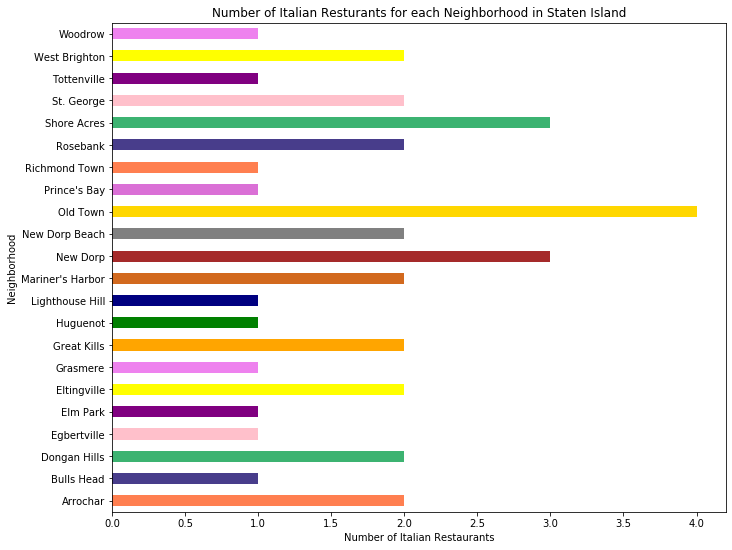

In [75]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

italian_staten_island.groupby('Neighborhood')['Venue Category'].count().plot(kind='barh',   
                                                                     figsize=(11,9),
                                                                     color=['coral', 'darkslateblue', 
                                                                            'mediumseagreen', 'pink', 'purple',
                                                                            'yellow', 'violet', 'orange', 'green',
                                                                            'navy', 'chocolate', 'brown', 'grey', 
                                                                            'gold', 'orchid'])
#plt.xticks(rotation=81)
plt.xlabel('Number of Italian Restaurants') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Number of Italian Resturants for each Neighborhood in Staten Island') # add title to the plot
#plt.legend() 

    
plt.show()

#### From the barh chart above 
## Old Town 
#### has more italian restaurants in staten island neighboroods than any other.

## 1.5. Analyze italian restaurants in each venue in the staten island data of each Neighborhoods .

In [76]:
# one hot encoding
staten_island_onehot = pd.get_dummies(italian_staten_island[['Venue']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
staten_island_onehot['Neighborhood'] = italian_staten_island['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [staten_island_onehot.columns[-1]] + list(staten_island_onehot.columns[:-1])
staten_island_onehot = staten_island_onehot[fixed_columns]
print(staten_island_onehot.shape)
staten_island_onehot.head()


(38, 36)


,Neighborhood,8 Morgan Lane Pool Club,Angie's Pizza & Restaurant,Basilio's Inn,Bella Mama Rose Italian Restaurant,Benvenuti Pizzeria e Trattoria,Bin 5,Bocelli,Brioso,Cafe Luna,Cafe Milano,Casa verde,Certo's Gourmet Foods & Caterers,Cielo Ristorante,Ciro,Classic Pizza,Da Noi Fingerboard,DiSara,Eat Italian,Enoteca Maria,Giovannis Trattoria,Italianissimo,La Stanza,La Strada,Little Italy Gourmet,Marie's 2,Mario's,Michael's Meatballs & Martinis,NiNi's Cafe,Nino's,Panini Grill,Piccolino's italian Restaurant,Tony's Brick Oven Pizzeria,Trattoria Romana,Villaggio,bella mama rosa staten island
6,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
78,Rosebank,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
82,Rosebank,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102,West Brighton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [77]:
staten_island_grouped = staten_island_onehot.groupby('Neighborhood').mean().reset_index()
print(staten_island_grouped.shape)
staten_island_grouped.head()


(22, 36)


,Neighborhood,8 Morgan Lane Pool Club,Angie's Pizza & Restaurant,Basilio's Inn,Bella Mama Rose Italian Restaurant,Benvenuti Pizzeria e Trattoria,Bin 5,Bocelli,Brioso,Cafe Luna,Cafe Milano,Casa verde,Certo's Gourmet Foods & Caterers,Cielo Ristorante,Ciro,Classic Pizza,Da Noi Fingerboard,DiSara,Eat Italian,Enoteca Maria,Giovannis Trattoria,Italianissimo,La Stanza,La Strada,Little Italy Gourmet,Marie's 2,Mario's,Michael's Meatballs & Martinis,NiNi's Cafe,Nino's,Panini Grill,Piccolino's italian Restaurant,Tony's Brick Oven Pizzeria,Trattoria Romana,Villaggio,bella mama rosa staten island
0,Arrochar,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bulls Head,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dongan Hills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Egbertville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Elm Park,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Print each neighborhood in staten_island_grouped along with the top 5 most common venues.

In [78]:
staten_island_italian_top_venues = 5

for hood in staten_island_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = staten_island_grouped[staten_island_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(staten_island_italian_top_venues))
    print('\n')


----Arrochar----
                            venue  freq
0                   Basilio's Inn   0.5
1                   Italianissimo   0.5
2         8 Morgan Lane Pool Club   0.0
3  Michael's Meatballs & Martinis   0.0
4                       La Stanza   0.0


----Bulls Head----
                            venue  freq
0         8 Morgan Lane Pool Club   1.0
1  Michael's Meatballs & Martinis   0.0
2                   Italianissimo   0.0
3                       La Stanza   0.0
4                       La Strada   0.0


----Dongan Hills----
                            venue  freq
0  Michael's Meatballs & Martinis   0.5
1                         Mario's   0.5
2         8 Morgan Lane Pool Club   0.0
3                   Italianissimo   0.0
4                       La Stanza   0.0


----Egbertville----
                     venue  freq
0            Classic Pizza   1.0
1  8 Morgan Lane Pool Club   0.0
2            Enoteca Maria   0.0
3            Italianissimo   0.0
4                La Stanza   0.0


### Put the venues into a pandas dataframe
#### First, write a function to sort the venues in descending order.


In [79]:
def return_most_common_venues(row, staten_island_italian_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:staten_island_italian_top_venues]


#### Create the new dataframe and display the top 10 staten island italian venues for each neighborhood

In [80]:
staten_island_italian_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(staten_island_italian_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
staten_island_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
staten_island_neighborhoods_venues_sorted['Neighborhood'] = staten_island_grouped['Neighborhood']

for ind in np.arange(staten_island_grouped.shape[0]):
    staten_island_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(staten_island_grouped.iloc[ind, :], staten_island_italian_top_venues)
    
print(staten_island_neighborhoods_venues_sorted.shape)
staten_island_neighborhoods_venues_sorted.head()

(22, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arrochar,Basilio's Inn,Italianissimo,bella mama rosa staten island,Cafe Milano,Classic Pizza,Ciro,Cielo Ristorante,Certo's Gourmet Foods & Caterers,Casa verde,Cafe Luna
1,Bulls Head,8 Morgan Lane Pool Club,Cafe Luna,Classic Pizza,Ciro,Cielo Ristorante,Certo's Gourmet Foods & Caterers,Casa verde,Cafe Milano,Brioso,DiSara
2,Dongan Hills,Mario's,Michael's Meatballs & Martinis,Brioso,Ciro,Cielo Ristorante,Certo's Gourmet Foods & Caterers,Casa verde,Cafe Milano,Cafe Luna,bella mama rosa staten island
3,Egbertville,Classic Pizza,bella mama rosa staten island,Cafe Luna,Ciro,Cielo Ristorante,Certo's Gourmet Foods & Caterers,Casa verde,Cafe Milano,Brioso,DiSara
4,Elm Park,Bella Mama Rose Italian Restaurant,bella mama rosa staten island,Cafe Luna,Classic Pizza,Ciro,Cielo Ristorante,Certo's Gourmet Foods & Caterers,Casa verde,Cafe Milano,Brioso


#### Get all the NYC venues by using getNearbyVenues function on each neighborhood in NYC data and create a new dataframe called nyc_venues

In [81]:
nyc_venues = getNearbyVenues(names=neighborhoods['Neighborhood'], 
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [82]:
#get the size of the dataframe

print(nyc_venues.shape)
nyc_venues.head()

(10013, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


### Find all the Italian restaurants in NYC venues from the Venue Category and create a dataframe italian_nyc

In [141]:
#combined_italian_resturants_NY=nyc_venues[nyc_venues['Venue Category']=='Italian Restaurant'] 

combined_italian_resturants_NY=nyc_venues[nyc_venues['Venue Category'].str.contains('Italian Restaurant')] 

italian_nyc = pd.DataFrame(combined_italian_resturants_NY)
print(italian_nyc.shape)
italian_nyc.head()

(305, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
155,Woodlawn,40.898273,-73.867315,Patrizia's Of Woodlawn,40.900638,-73.867724,Italian Restaurant
231,Pelham Parkway,40.857413,-73.854756,Enzo's,40.854232,-73.854362,Italian Restaurant
240,Pelham Parkway,40.857413,-73.854756,Pasta Pasta,40.854788,-73.854929,Italian Restaurant
255,City Island,40.847247,-73.786488,Artie's Steak and Seafood,40.849542,-73.787317,Italian Restaurant
495,High Bridge,40.836623,-73.926102,Giovanni's Iv Italian Restraurant & Pizzeria,40.835239,-73.920861,Italian Restaurant


#### From the above dataframe there are 305 italian restaurants in nyc from the data we have.

## Horizontal Bar plot showing the number of Italian Restaurants in NYC neighborhoods.


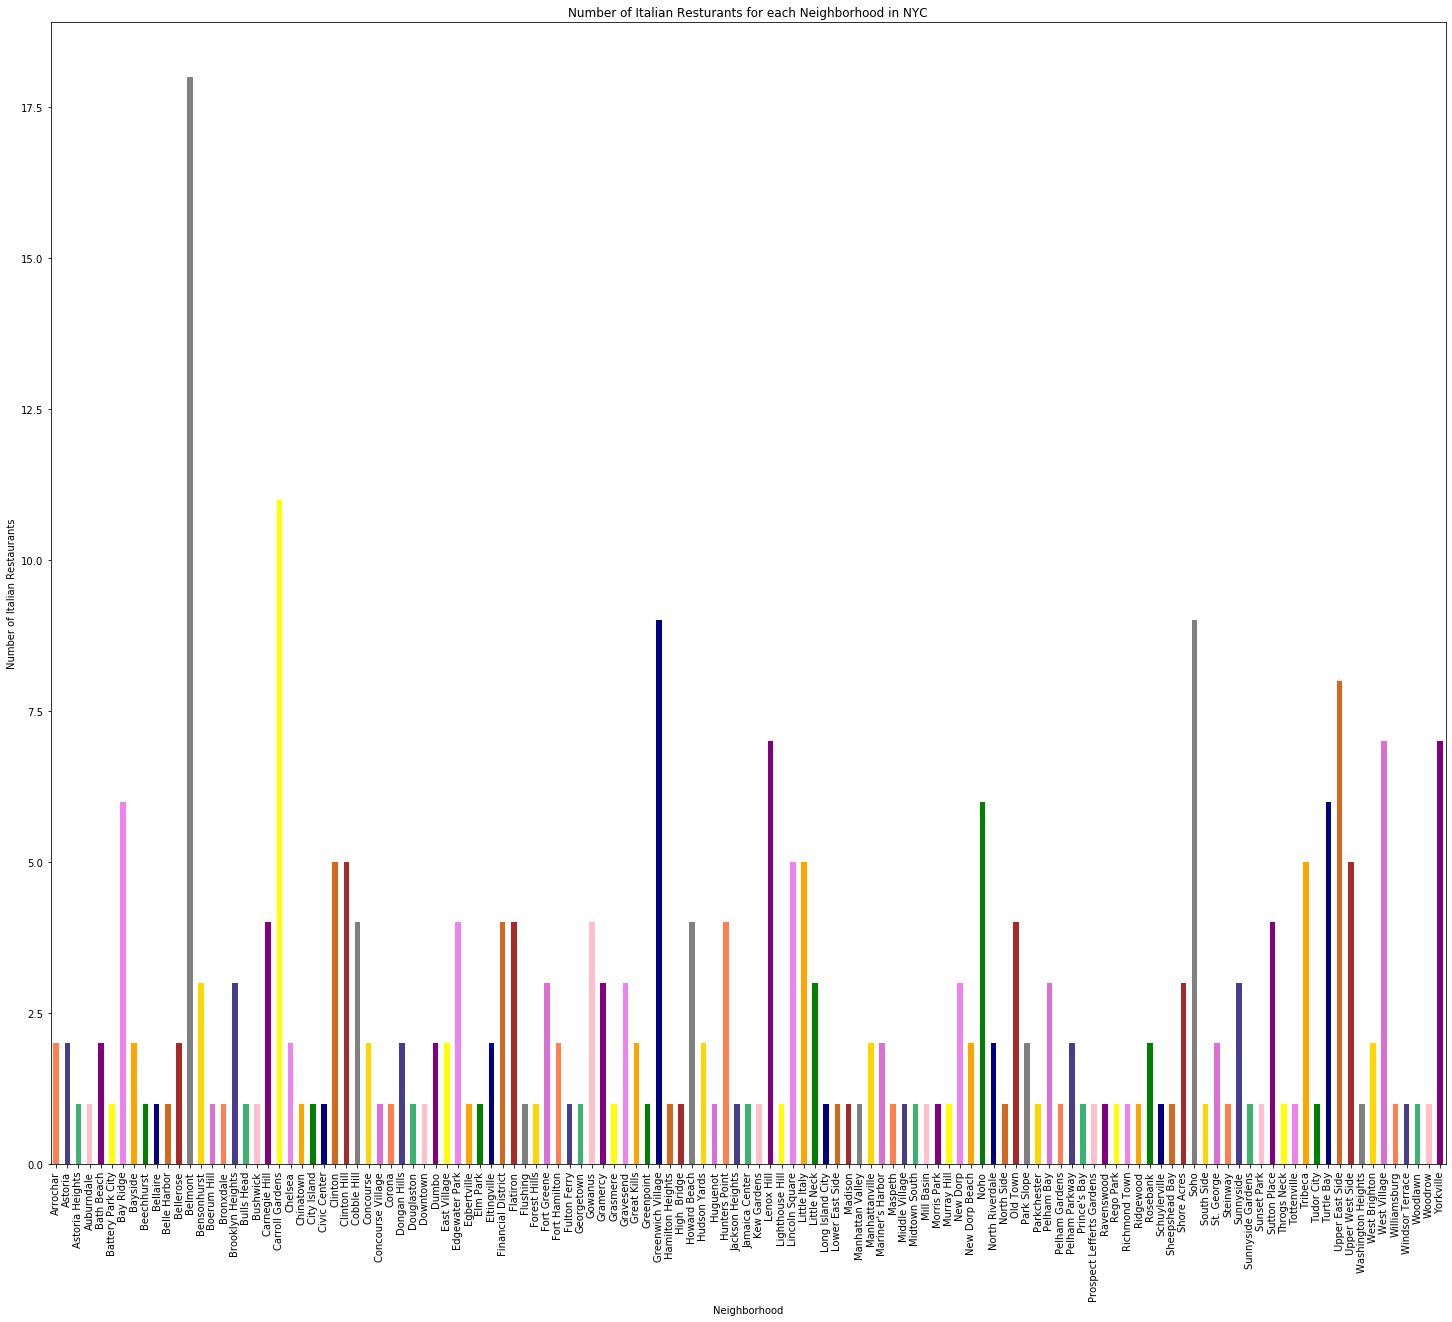

In [85]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

italian_nyc.groupby('Neighborhood')['Venue Category'].count().plot(kind='bar',   
                                                                     figsize=(25,21),
                                                                     color=['coral', 'darkslateblue', 
                                                                            'mediumseagreen', 'pink', 'purple',
                                                                            'yellow', 'violet', 'orange', 'green',
                                                                            'navy', 'chocolate', 'brown', 'grey', 
                                                                            'gold', 'orchid'])
#plt.xticks(rotation=81)
plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Italian Restaurants') # add y-label to the plot
plt.title('Number of Italian Resturants for each Neighborhood in NYC') # add title to the plot
#plt.legend() 

    
plt.show()

#### From the barh chart above
## Belmont
#### has more italian restaurants in nyc neighboroods than any other.

#### Concatenate the original neighborhood data and the nyc italian restaurant to add the borough in the fianl nyc italian restaurant data.

In [149]:
#nyc_brough_italian_restaurants = pd.concat([neighborhoods, italian_nyc], axis=1, join='inner')


#print(nyc_brough_italian_restaurants.shape)
#nyc_brough_italian_restaurants.head()


#nyc_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_brough_italian_restaurants = neighborhoods.join(italian_nyc.set_index('Neighborhood')).dropna()
print(nyc_brough_italian_restaurants.shape)
nyc_brough_italian_restaurants.head() # check the last columns!

(311, 9)


,Borough,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,,,
Arrochar,Staten Island,40.596313,-74.067124,40.596313,-74.067124,Basilio's Inn,40.597369,-74.063674,Italian Restaurant
Arrochar,Staten Island,40.596313,-74.067124,40.596313,-74.067124,Italianissimo,40.598596,-74.065619,Italian Restaurant
Astoria,Queens,40.768509,-73.915654,40.768509,-73.915654,Antika Restaurant & Pizzeria,40.764903,-73.917158,Italian Restaurant
Astoria,Queens,40.768509,-73.915654,40.768509,-73.915654,Via Trenta,40.764743,-73.916641,Italian Restaurant
Astoria Heights,Queens,40.770317,-73.894680,40.770317,-73.894680,Antonio's Kitchen,40.768154,-73.894684,Italian Restaurant


### Bar plot for the number of italian restaurants in each borough of NYC data

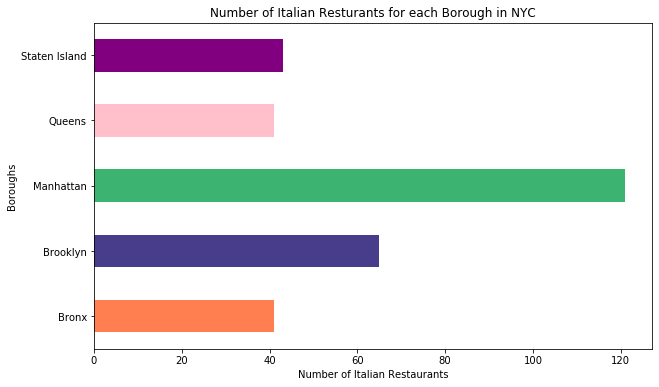

In [163]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

nyc_brough_italian_restaurants.groupby('Borough')['Venue Category'].count().plot(kind='barh',   
                                                                     figsize=(10,6),
                                                                     color=['coral', 'darkslateblue', 
                                                                            'mediumseagreen', 'pink', 'purple',
                                                                            'yellow', 'violet', 'orange', 'green',
                                                                            'navy', 'chocolate', 'brown', 'grey', 
                                                                            'gold', 'orchid'])
#plt.xticks(rotation=45)
plt.xlabel('Number of Italian Restaurants') # add to x-label to the plot
plt.ylabel('Boroughs') # add y-label to the plot
plt.title('Number of Italian Resturants for each Borough in NYC') # add title to the plot
#plt.legend() 

    
plt.show()

#### From the above plot Manhattan has more italian restaurants than any other boroughs in NYC data according 
#### to the data we have whcih may have some missing values or data.
### Manhatta = 121 Italian Restaurants
### Brooklyn = 65 Italian Restaurants
### Bronx = 40 Italian Restaurants
### Queens = 41 Italian Restaurants
### Staten Island = 42 Italian Restaurants

In [165]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_brough_italian_restaurants[['Venue']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
#nyc_onehot['Neighborhood'] = nyc_brough_italian_restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]
print(nyc_onehot.shape)
nyc_onehot.head()


(311, 275)


,joey pizza Jamaica ave 166-14,8 Morgan Lane Pool Club,83 1/2,Ai Fiori,Alba's Pizza & Restaurant,Angie's Pizza & Restaurant,Ann & Tony's - An Original Arthur Avenue Restaurant,Antika Restaurant & Pizzeria,Antonio's Kitchen,Antonio's Trattoria,Antonucci,Aperture Restaurant,Arthur Avenue Cafe,Arthur Avenue Fiasco,Artie's Steak and Seafood,Arturo's,Arturo's Ristorante Italiano,Aunt Bella's,Aurora,Avellino Ristorante & Pizzeria,Avon,Bacaro,Baci,Bar Primi,Bar Tano,Basilio's Inn,Beccofino,Bella Mama Rose Italian Restaurant,Bella Via,Benvenuti Pizzeria e Trattoria,Bettolona,Bevacco,Bigoi Venezia,Bin 5,Bocca Di Bacco,Bocelli,Botte Bar,Brioso,Brothers Ravioli,Cafe Altro Paradiso,Cafe Fiorello,Cafe Lore,Cafe Luna,Cafe Milano,Cafe On The Hill,Cafe al Mercato,Caffe Buon Gusto - Manhattan,Caffe e Vino,Calabria Pork Store,Camillo,Campagnola Restaurant,Campania Coal Fired Pizza,Cara Mia Restaurant,Carbone,Carmenta’s,Carmine's Italian Restaurant,Carroll Place,Casa Edesia Pizza and Grill,Casa verde,Cecconi's,Celeste,Certo's Gourmet Foods & Caterers,Charlie Bird,Cibo E Vino,Cielo Ristorante,Cipriani Downtown,Ciro,Ciros on Smith,Classic Pizza,Claudine's,Cotenna,Da Ciro Brooklyn,Da Noi Fingerboard,Da Nonna Rosa Cucina Italiana,Dante NYC,David Greco's Arthur Avenue Trattoria,Dazie's Restaurant,Del Posto,Delizia 73 Ristorante & Pizza,DiSara,Dino,Divino,Dominick's Restaurant,Dough Vale,Durso's Pasta & Ravioli Company,Eat Italian,Elio's,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin,F & J Pine Tavern,Felice,Felice 83,Follia,Fragole,Frank Restaurant,Frankies 457 Spuntino,Franks Wine Bar,Fratelli's,Fumo,Gaetana's Cucina Italiana,Gaia Italian Cafe,Gelso & Grand,Gerbasi Ristorante,Gersi,Giacomo's Wood Fired Pizza & Trattoria,Giardino D'oro,Gigino Trattoria,Gina La Fornarina,Giovanni's Brooklyn Eats,Giovanni's Italian Restaurant,Giovanni's Iv Italian Restraurant & Pizzeria,Giovannis Trattoria,Gnocco,Harry's Italian Pizza Bar,Hearth,Il Bacco,Il Carino,Il Fornetto,Il Mulino New York,Il Posto Accanto,Il Punto Ristorante,Il Sapore Pizza,Il Violino Restaurant,Isle of Capri,Italianissimo,Italianissimo Ristorante,Joanne Trattoria,Joe's Restaurant,Joe's of Avenue U,L'Amico,L'Artusi,La Grotta di Marcello,La PIzzetta,La Pecora Bianca,La Pizza & La Pasta,La Stanza,La Strada,La Vela Dining & Bar,La Villetta,LaRina Pastificio & Vino,Landi's Pork Store,Lex Restaurant,Lil' Frankie's,Lillo,Little Italy Gourmet,Locanda Verde,Lorraine's Bar and Grill,Louis Seafood,Lucca Italian Restaurant,Madison's,Maestro Pasta,Magna Restaurant,Maialino,Malaparte,Malatesta Trattoria,Manducatis,Manducatis Rustica,Manetta's Ristorante,Marco Polo Ristorante,Marie's 2,Mario's,Mario's Restaurant & Catering,Mario's Restautant,Mezzaluna Restaurants,Michael's,Michael's Meatballs & Martinis,Michaelangelo's Coal Fired Brick Oven Pizza Restaurant,Michelino's,Mimi's Italian Restaurant & Piano Bar,Morandi,Naked Dog,NiNi's Cafe,Nica Trattoria,Nino's,Nizza,Noi Due,Noi Due Carne,Noodle Pudding,Numero 28,Oro Restaurant and Lounge,Osteria 106,Osteria Cotta,Osteria Morini,Panini Grill,Panzerotti Bites,Papazzio Restaurant,Park Side,Parm,Parma Restaurant,Pasquale Riggaletto's,Pasta Pasta,Patricia's,Patricia's of Tremont,Patrizia's Of Woodlawn,Patrizia's of Manhattan,Patrizia's of Maspeth,Paul Michael Brick Oven Cafe,Pepe Rosso To Go,Pepolino,Piccolino's italian Restaurant,Pietro's,Pino's Ristorante,Pisticci Ristorante,Pizzeria Sirenetta,Plum Tomatoes,Popina,Porto Salvo,Positano,Prima Pasta & Cafe,Rezdôra,Rino's Italian Restaurant,Ristorante DeGrezia,Ristorante Grifone,River Deli,Roberto's,Roma View Catering,Roman’s,Rubirosa Ristorante,Rucola,Saggio Restaurant,San Carlo Osteria Piemonte,San Gennaro Ristorante,Sant Ambroeus,Sant Ambroeus West Village,Scalinatella,Scalini Fedeli,Sergimmo Salumeria,Sfoglia,Sistina,Sofia Restorante Italiano,SoleLuna,Song' e Napule Pizzeria,Speedy Romeo LES,Spoto's Italian Restaurant,Supper,Table 87,Tavola,Tevere,The Meatball Shop,

In [166]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
print(nyc_grouped.shape)
nyc_grouped.head()

(125, 276)


,Neighborhood,joey pizza Jamaica ave 166-14,8 Morgan Lane Pool Club,83 1/2,Ai Fiori,Alba's Pizza & Restaurant,Angie's Pizza & Restaurant,Ann & Tony's - An Original Arthur Avenue Restaurant,Antika Restaurant & Pizzeria,Antonio's Kitchen,Antonio's Trattoria,Antonucci,Aperture Restaurant,Arthur Avenue Cafe,Arthur Avenue Fiasco,Artie's Steak and Seafood,Arturo's,Arturo's Ristorante Italiano,Aunt Bella's,Aurora,Avellino Ristorante & Pizzeria,Avon,Bacaro,Baci,Bar Primi,Bar Tano,Basilio's Inn,Beccofino,Bella Mama Rose Italian Restaurant,Bella Via,Benvenuti Pizzeria e Trattoria,Bettolona,Bevacco,Bigoi Venezia,Bin 5,Bocca Di Bacco,Bocelli,Botte Bar,Brioso,Brothers Ravioli,Cafe Altro Paradiso,Cafe Fiorello,Cafe Lore,Cafe Luna,Cafe Milano,Cafe On The Hill,Cafe al Mercato,Caffe Buon Gusto - Manhattan,Caffe e Vino,Calabria Pork Store,Camillo,Campagnola Restaurant,Campania Coal Fired Pizza,Cara Mia Restaurant,Carbone,Carmenta’s,Carmine's Italian Restaurant,Carroll Place,Casa Edesia Pizza and Grill,Casa verde,Cecconi's,Celeste,Certo's Gourmet Foods & Caterers,Charlie Bird,Cibo E Vino,Cielo Ristorante,Cipriani Downtown,Ciro,Ciros on Smith,Classic Pizza,Claudine's,Cotenna,Da Ciro Brooklyn,Da Noi Fingerboard,Da Nonna Rosa Cucina Italiana,Dante NYC,David Greco's Arthur Avenue Trattoria,Dazie's Restaurant,Del Posto,Delizia 73 Ristorante & Pizza,DiSara,Dino,Divino,Dominick's Restaurant,Dough Vale,Durso's Pasta & Ravioli Company,Eat Italian,Elio's,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin,F & J Pine Tavern,Felice,Felice 83,Follia,Fragole,Frank Restaurant,Frankies 457 Spuntino,Franks Wine Bar,Fratelli's,Fumo,Gaetana's Cucina Italiana,Gaia Italian Cafe,Gelso & Grand,Gerbasi Ristorante,Gersi,Giacomo's Wood Fired Pizza & Trattoria,Giardino D'oro,Gigino Trattoria,Gina La Fornarina,Giovanni's Brooklyn Eats,Giovanni's Italian Restaurant,Giovanni's Iv Italian Restraurant & Pizzeria,Giovannis Trattoria,Gnocco,Harry's Italian Pizza Bar,Hearth,Il Bacco,Il Carino,Il Fornetto,Il Mulino New York,Il Posto Accanto,Il Punto Ristorante,Il Sapore Pizza,Il Violino Restaurant,Isle of Capri,Italianissimo,Italianissimo Ristorante,Joanne Trattoria,Joe's Restaurant,Joe's of Avenue U,L'Amico,L'Artusi,La Grotta di Marcello,La PIzzetta,La Pecora Bianca,La Pizza & La Pasta,La Stanza,La Strada,La Vela Dining & Bar,La Villetta,LaRina Pastificio & Vino,Landi's Pork Store,Lex Restaurant,Lil' Frankie's,Lillo,Little Italy Gourmet,Locanda Verde,Lorraine's Bar and Grill,Louis Seafood,Lucca Italian Restaurant,Madison's,Maestro Pasta,Magna Restaurant,Maialino,Malaparte,Malatesta Trattoria,Manducatis,Manducatis Rustica,Manetta's Ristorante,Marco Polo Ristorante,Marie's 2,Mario's,Mario's Restaurant & Catering,Mario's Restautant,Mezzaluna Restaurants,Michael's,Michael's Meatballs & Martinis,Michaelangelo's Coal Fired Brick Oven Pizza Restaurant,Michelino's,Mimi's Italian Restaurant & Piano Bar,Morandi,Naked Dog,NiNi's Cafe,Nica Trattoria,Nino's,Nizza,Noi Due,Noi Due Carne,Noodle Pudding,Numero 28,Oro Restaurant and Lounge,Osteria 106,Osteria Cotta,Osteria Morini,Panini Grill,Panzerotti Bites,Papazzio Restaurant,Park Side,Parm,Parma Restaurant,Pasquale Riggaletto's,Pasta Pasta,Patricia's,Patricia's of Tremont,Patrizia's Of Woodlawn,Patrizia's of Manhattan,Patrizia's of Maspeth,Paul Michael Brick Oven Cafe,Pepe Rosso To Go,Pepolino,Piccolino's italian Restaurant,Pietro's,Pino's Ristorante,Pisticci Ristorante,Pizzeria Sirenetta,Plum Tomatoes,Popina,Porto Salvo,Positano,Prima Pasta & Cafe,Rezdôra,Rino's Italian Restaurant,Ristorante DeGrezia,Ristorante Grifone,River Deli,Roberto's,Roma View Catering,Roman’s,Rubirosa Ristorante,Rucola,Saggio Restaurant,San Carlo Osteria Piemonte,San Gennaro Ristorante,Sant Ambroeus,Sant Ambroeus West Village,Scalinatella,Scalini Fedeli,Sergimmo Salumeria,Sfoglia,Sistina,Sofia Restorante Italiano,SoleLuna,Song' e Napule Pizzeria,Speedy Romeo LES,Spoto's Italian Restaurant,Supper,Table 87,Tavola,Tevere,The M

In [167]:
nyc_italian_top_venues = 5

for hood in nyc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nyc_grouped[nyc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(nyc_italian_top_venues))
    print('\n')


----Arrochar----
              venue  freq
0     Italianissimo   0.5
1     Basilio's Inn   0.5
2  Panzerotti Bites   0.0
3    Osteria Morini   0.0
4     Osteria Cotta   0.0


----Astoria----
                          venue  freq
0                    Via Trenta   0.5
1  Antika Restaurant & Pizzeria   0.5
2                 Noi Due Carne   0.0
3                Osteria Morini   0.0
4                 Osteria Cotta   0.0


----Astoria Heights----
                           venue  freq
0              Antonio's Kitchen   1.0
1  joey pizza Jamaica ave 166-14   0.0
2                  Noi Due Carne   0.0
3                 Osteria Morini   0.0
4                  Osteria Cotta   0.0


----Auburndale----
                             venue  freq
0  Durso's Pasta & Ravioli Company   1.0
1    joey pizza Jamaica ave 166-14   0.0
2                   Noodle Pudding   0.0
3                   Osteria Morini   0.0
4                    Osteria Cotta   0.0


----Bath Beach----
                         venue  f

In [183]:

def return_most_common_venues(row, nyc_italian_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:nyc_italian_top_venues]



#### Get the 10 most common italian venues in NYC

In [184]:


nyc_italian_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(nyc_italian_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nyc_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
nyc_neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

for ind in np.arange(nyc_grouped.shape[0]):
    nyc_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], nyc_italian_top_venues)
    
print(nyc_neighborhoods_venues_sorted.shape)
nyc_neighborhoods_venues_sorted.head()

(125, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arrochar,Basilio's Inn,Italianissimo,il Colosseo,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin
1,Astoria,Via Trenta,Antika Restaurant & Pizzeria,il Colosseo,Extra Virgin,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant
2,Astoria Heights,Antonio's Kitchen,Eat Italian,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin,il Colosseo
3,Auburndale,Durso's Pasta & Ravioli Company,Extra Virgin,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,il Colosseo,Elio's
4,Bath Beach,Pino's Ristorante,Casa Edesia Pizza and Grill,il Colosseo,Evelina Restaurant,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Extra Virgin


# 2. Cluster Neighborhoods Run k-means to cluster the nyc italian restaurants neighborhoods into 5 clusters.


In [185]:
# set number of clusters
kclusters = 5

nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### Let's create a new dataframe that includes the cluster as well as the top 10 italian venues for each neighborhood in nyc italian restaurants.



In [186]:
# add clustering labels
nyc_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#nyc_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_merged = nyc_brough_italian_restaurants.join(nyc_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

nyc_merged.head() # check the last columns!


,Borough,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,,,,,
Arrochar,Staten Island,40.596313,-74.067124,40.596313,-74.067124,Basilio's Inn,40.597369,-74.063674,Italian Restaurant,0,Basilio's Inn,Italianissimo,il Colosseo,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin
Arrochar,Staten Island,40.596313,-74.067124,40.596313,-74.067124,Italianissimo,40.598596,-74.065619,Italian Restaurant,0,Basilio's Inn,Italianissimo,il Colosseo,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin
Astoria,Queens,40.768509,-73.915654,40.768509,-73.915654,Antika Restaurant & Pizzeria,40.764903,-73.917158,Italian Restaurant,0,Via Trenta,Antika Restaurant & Pizzeria,il Colosseo,Extra Virgin,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant
Astoria,Queens,40.768509,-73.915654,40.768509,-73.915654,Via Trenta,40.764743,-73.916641,Italian Restaurant,0,Via Trenta,Antika Restaurant & Pizzeria,il Colosseo,Extra Virgin,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant
Astoria Heights,Queens,40.770317,-73.894680,40.770317,-73.894680,Antonio's Kitchen,40.768154,-73.894684,Italian Restaurant,0,Antonio's Kitchen,Eat Italian,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin,il Colosseo


#### Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, assign a name to each cluster.
## Cluster 1

In [187]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Latitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,
Arrochar,40.596313,Basilio's Inn,40.597369,-74.063674,Italian Restaurant,0,Basilio's Inn,Italianissimo,il Colosseo,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin
Arrochar,40.596313,Italianissimo,40.598596,-74.065619,Italian Restaurant,0,Basilio's Inn,Italianissimo,il Colosseo,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin
Astoria,40.768509,Antika Restaurant & Pizzeria,40.764903,-73.917158,Italian Restaurant,0,Via Trenta,Antika Restaurant & Pizzeria,il Colosseo,Extra Virgin,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant
Astoria,40.768509,Via Trenta,40.764743,-73.916641,Italian Restaurant,0,Via Trenta,Antika Restaurant & Pizzeria,il Colosseo,Extra Virgin,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant
Astoria Heights,40.770317,Antonio's Kitchen,40.768154,-73.894684,Italian Restaurant,0,Antonio's Kitchen,Eat Italian,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin,il Colosseo
Auburndale,40.761730,Durso's Pasta & Ravioli Company,40.763338,-73.793057,Italian Restaurant,0,Durso's Pasta & Ravioli Company,Extra Virgin,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,il Colosseo,Elio's
Bath Beach,40.599519,Pino's Ristorante,40.600955,-74.000806,Italian Restaurant,0,Pino's Ristorante,Casa Edesia Pizza and Grill,il Colosseo,Evelina Restaurant,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Extra Virgin
Bath Beach,40.599519,Casa Edesia Pizza and Grill,40.599751,-74.002672,Italian Restaurant,0,Pino's Ristorante,Casa Edesia Pizza and Grill,il Colosseo,Evelina Restaurant,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Extra Virgin
Battery Park City,40.711932,Parm,40.714514,-74.016264,Italian Restaurant,0,Parm,il Colosseo,Evelina Restaurant,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Extra Virgin,Eat Italian


#### Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, assign a name to each cluster.
## Cluster 2


In [188]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 1, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Latitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,
Chelsea,40.744035,The Meatball Shop,40.745988,-74.001686,Italian Restaurant,1,Del Posto,The Meatball Shop,F & J Pine Tavern,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin,il Colosseo
Chelsea,40.744035,Del Posto,40.743439,-74.007449,Italian Restaurant,1,Del Posto,The Meatball Shop,F & J Pine Tavern,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin,il Colosseo
Chelsea,40.594726,The Meatball Shop,40.745988,-74.001686,Italian Restaurant,1,Del Posto,The Meatball Shop,F & J Pine Tavern,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin,il Colosseo
Chelsea,40.594726,Del Posto,40.743439,-74.007449,Italian Restaurant,1,Del Posto,The Meatball Shop,F & J Pine Tavern,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin,il Colosseo
North Side,40.714823,The Meatball Shop,40.718170,-73.957502,Italian Restaurant,1,The Meatball Shop,il Colosseo,F & J Pine Tavern,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin,Felice


#### Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, assign a name to each cluster.
## Cluster 3

In [189]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 2, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Latitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,
South Side,40.710861,Dough Vale,40.709306,-73.954056,Italian Restaurant,2,Dough Vale,il Colosseo,Extra Virgin,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,F & J Pine Tavern,Elio's
Williamsburg,40.707144,Dough Vale,40.709306,-73.954056,Italian Restaurant,2,Dough Vale,il Colosseo,Extra Virgin,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,F & J Pine Tavern,Elio's


#### Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, assign a name to each cluster.
## Cluster 4

In [190]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 3, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Latitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,
Lighthouse Hill,40.576506,Casa verde,40.573267,-74.136584,Italian Restaurant,3,Casa verde,il Colosseo,Evelina Restaurant,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Extra Virgin,Eat Italian
Richmond Town,40.569606,Casa verde,40.573267,-74.136584,Italian Restaurant,3,Casa verde,il Colosseo,Evelina Restaurant,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Extra Virgin,Eat Italian


#### Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, assign a name to each cluster.
## Cluster 5

In [191]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 4, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Latitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,
Georgetown,40.623845,Landi's Pork Store,40.619633,-73.917918,Italian Restaurant,4,Landi's Pork Store,Eat Italian,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin,il Colosseo
Mill Basin,40.615974,Landi's Pork Store,40.619633,-73.917918,Italian Restaurant,4,Landi's Pork Store,Eat Italian,Emilia's Restaurant,Emporio,Enoteca Maria,Enoteca on Court,Enzo's,Evelina Restaurant,Extra Virgin,il Colosseo


## Conclusion.

1. Manhattan is the best place to find italian restaurants in nyc as it has more than any other boroughs,
2. Manhattan is also likely to be the best market for italian restaurants if one is looking for which borough to open a restaurant,
but we will advice to look for the neighborhood in manhattan with the least italina restaurant as shown in the bar plot fro manhattan
because competion in business is really high so sales increase with scacity in supply therefore this what we recommend.
The same thing apply to other boroughs in terms of opening italian restaurants on NYC.


3. We have based our analysis on the data provided by foursquare and nyc data, so there may be inaccuracy but 
the method and approach of the analysis can produce real results on real data in similar analysis.

4. We have also omit the ratings for each restaurants since we have the rankings of every top 10 restaurants in each borough
which should give an idea about the ratings of the top best italian restaurants of each borough.